Deep learning Assignment-2

CNN for Image Classification


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report

Loading the Dataset

In [ ]:
Train_Data = pd.read_csv('fashion-mnist_train.csv')
Test_Data = pd.read_csv('fashion-mnist_test.csv')

display(Train_Data)
display(Test_Data)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


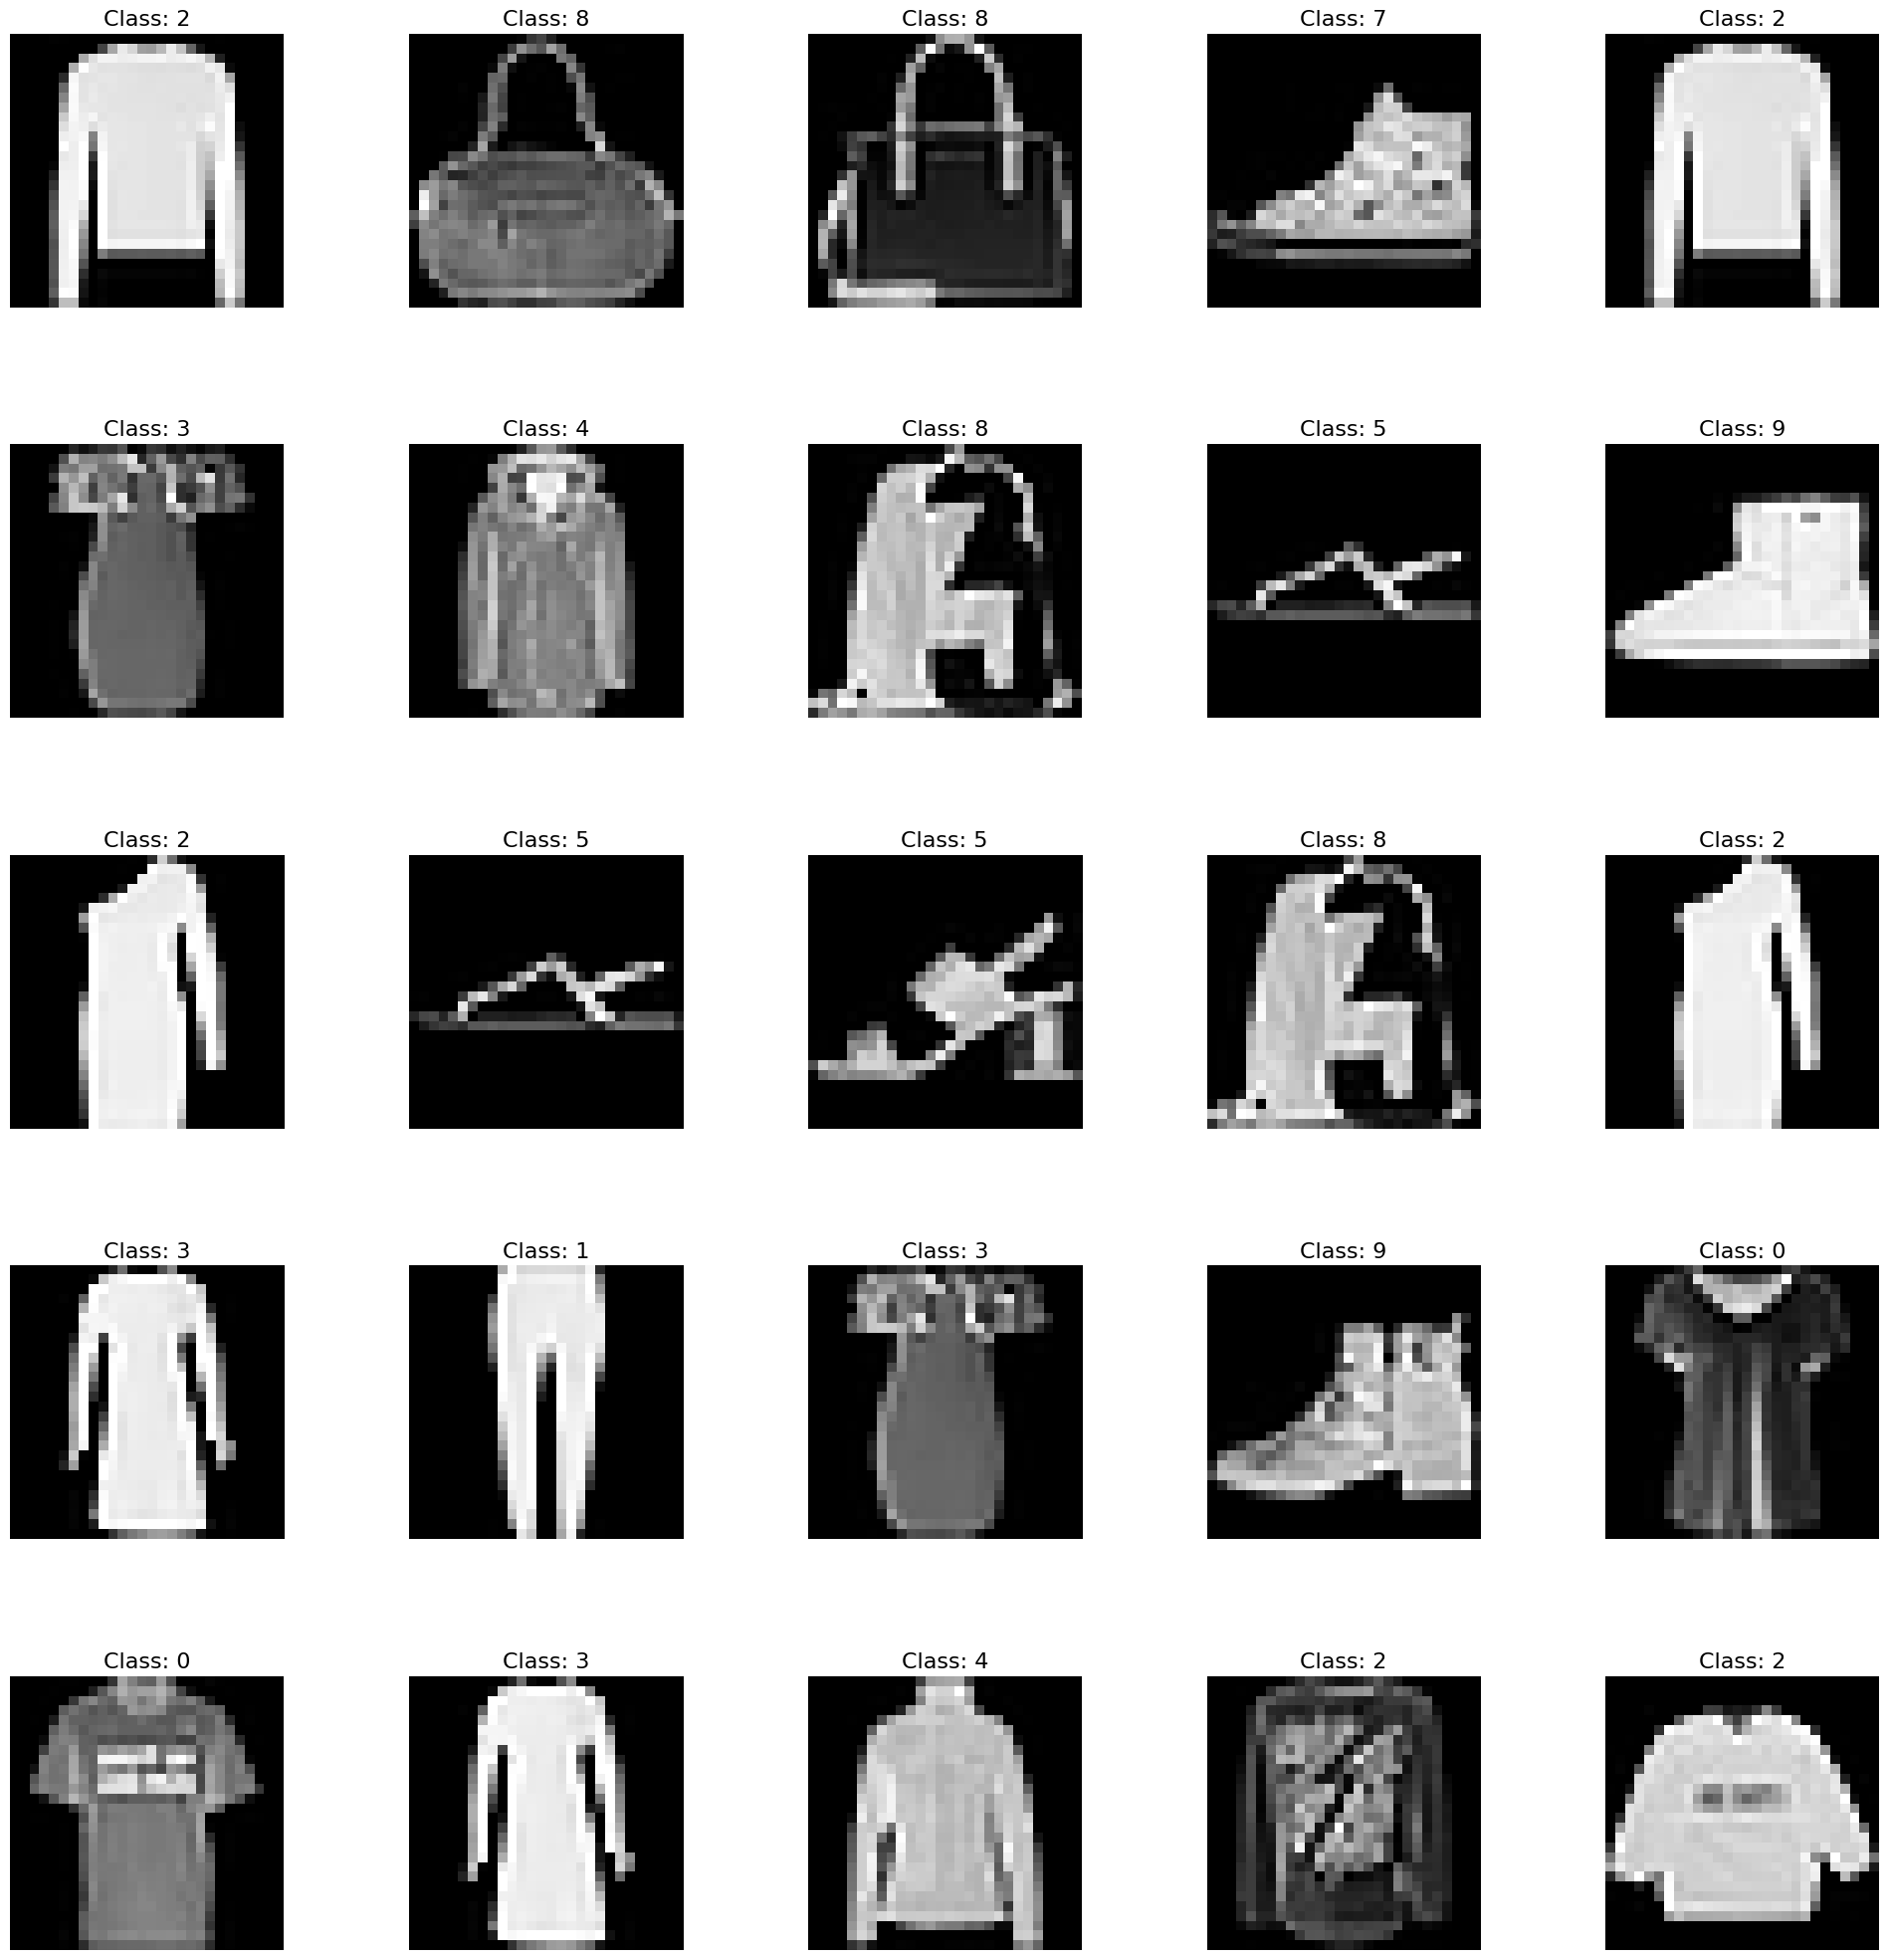

In [ ]:
Train_image = Train_Data.values
Test_image = Test_Data.values
# Dimensions of the image grid.
grid_width = 25
grid_height = 25

fig, axes = plt.subplots(5, 5, figsize=(25, 25))
axes = axes.ravel()

for i in range(0,25):
    # Draft random index to get random image.
    index = np.random.randint(0, 60)
    axes[i].imshow(Train_image[index, 1:].reshape(28, 28), cmap='gray')
    # Show image class label above the drafted image.
    axes[i].set_title("Class: " + str(Train_image[index, 0]), fontsize=16)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)

In [ ]:
X_train = Train_image[:, 1:] / 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
y_train = Train_image[:, 0]

X_test = Test_image[:, 1:] / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_test = Test_image[:, 0]


print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Layer 1
basic_cnn = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # Corrected line
    layers.Conv2D(64, (3, 3), strides=2, activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [ ]:
basic_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)               0

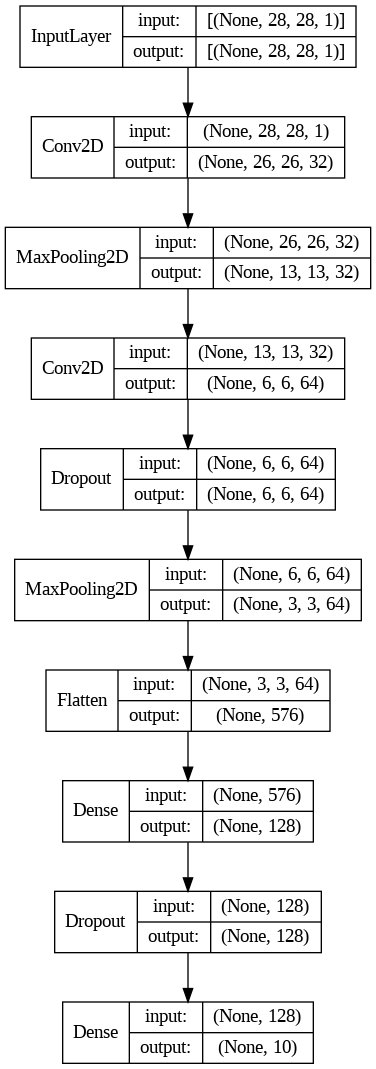

In [ ]:
tf.keras.utils.plot_model(basic_cnn, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
early_stopping_callback = callbacks.EarlyStopping(patience=10)

batch_size = X_train.shape[0]//20



basic_cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

epochs_info = basic_cnn.fit(X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=20,
                            callbacks=[early_stopping_callback],
                            validation_split=0.15)

Epoch 1/20
17/17 [==============================] - 12s 59ms/step - loss: 1.8821 - accuracy: 0.3201 - val_loss: 1.3944 - val_accuracy: 0.6301
Epoch 2/20
17/17 [==============================] - 1s 45ms/step - loss: 1.1490 - accuracy: 0.5689 - val_loss: 1.0008 - val_accuracy: 0.6943
Epoch 3/20
17/17 [==============================] - 1s 43ms/step - loss: 0.8932 - accuracy: 0.6683 - val_loss: 0.8349 - val_accuracy: 0.7351
Epoch 4/20
17/17 [==============================] - 1s 47ms/step - loss: 0.7669 - accuracy: 0.7145 - val_loss: 0.7268 - val_accuracy: 0.7641
Epoch 5/20
17/17 [==============================] - 1s 48ms/step - loss: 0.6962 - accuracy: 0.7403 - val_loss: 0.6818 - val_accuracy: 0.7759
Epoch 6/20
17/17 [==============================] - 1s 47ms/step - loss: 0.6481 - accuracy: 0.7594 - val_loss: 0.6338 - val_accuracy: 0.7963
Epoch 7/20
17/17 [==============================] - 1s 47ms/step - loss: 0.6145 - accuracy: 0.7698 - val_loss: 0.5950 - val_accuracy: 0.8116
Epoch 8/20
1

In [ ]:
basic_cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4051 - accuracy: 0.8700


[0.40509629249572754, 0.8700000047683716]

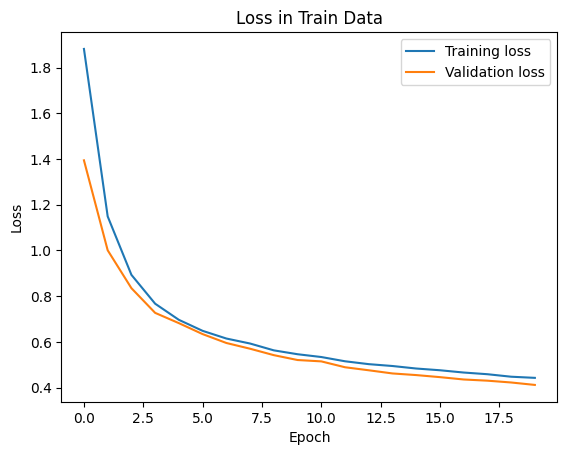

In [ ]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("Loss in Train Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

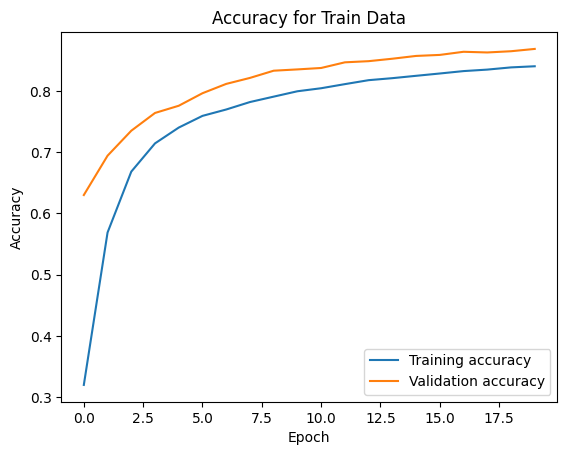

In [ ]:
plt.plot(epochs_info.history['accuracy'])
plt.plot(epochs_info.history['val_accuracy'])
plt.title("Accuracy for Train Data")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

313/313 [==============================] - 1s 2ms/step


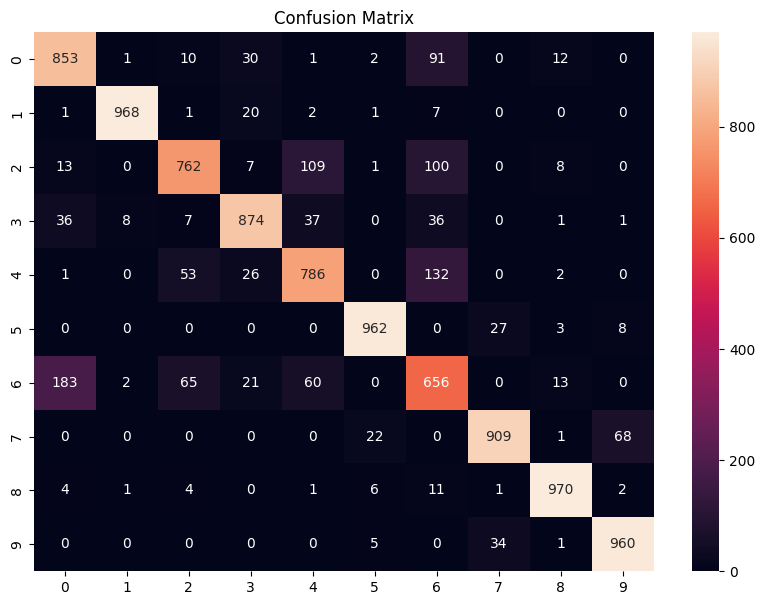

In [ ]:
y_pred = basic_cnn.predict(X_test)

# Get the class with highest predicted probability and assume it is the
# model prediction.
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class_names = ["0 -> T-shirt",
               "1 -> Trouser",
               "2 -> Pullover",
               "3 -> Dress",
               "4 -> Coat",
               "5 -> Sandal",
               "6 -> Shirt",
               "7 -> Sneaker",
               "8 -> Bag",
               "9 -> Ankle boot"]
print(classification_report(y_test, y_pred_classes, target_names=class_names))

                 precision    recall  f1-score   support

   0 -> T-shirt       0.78      0.85      0.82      1000
   1 -> Trouser       0.99      0.97      0.98      1000
  2 -> Pullover       0.84      0.76      0.80      1000
     3 -> Dress       0.89      0.87      0.88      1000
      4 -> Coat       0.79      0.79      0.79      1000
    5 -> Sandal       0.96      0.96      0.96      1000
     6 -> Shirt       0.64      0.66      0.65      1000
   7 -> Sneaker       0.94      0.91      0.92      1000
       8 -> Bag       0.96      0.97      0.96      1000
9 -> Ankle boot       0.92      0.96      0.94      1000

       accuracy                           0.87     10000
      macro avg       0.87      0.87      0.87     10000
   weighted avg       0.87      0.87      0.87     10000



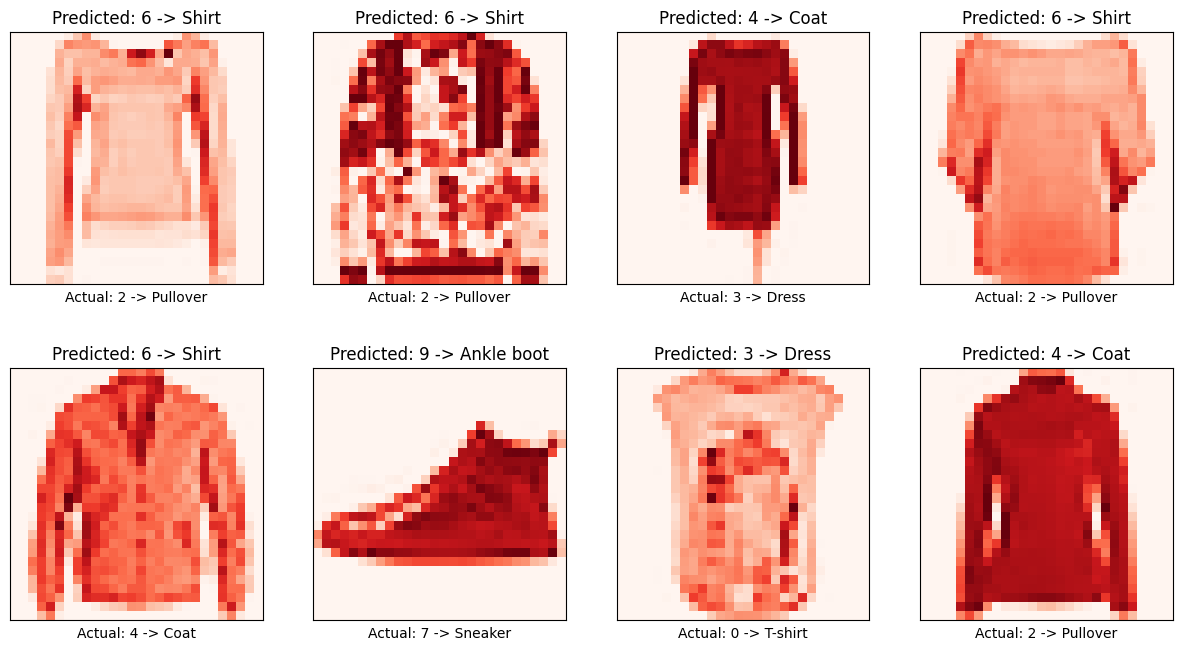

In [ ]:
incorrect = np.nonzero(y_pred_classes!=y_test)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[y_pred_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))

VGG MODEL

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the VGG-like model
vgg_1= keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
vgg_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

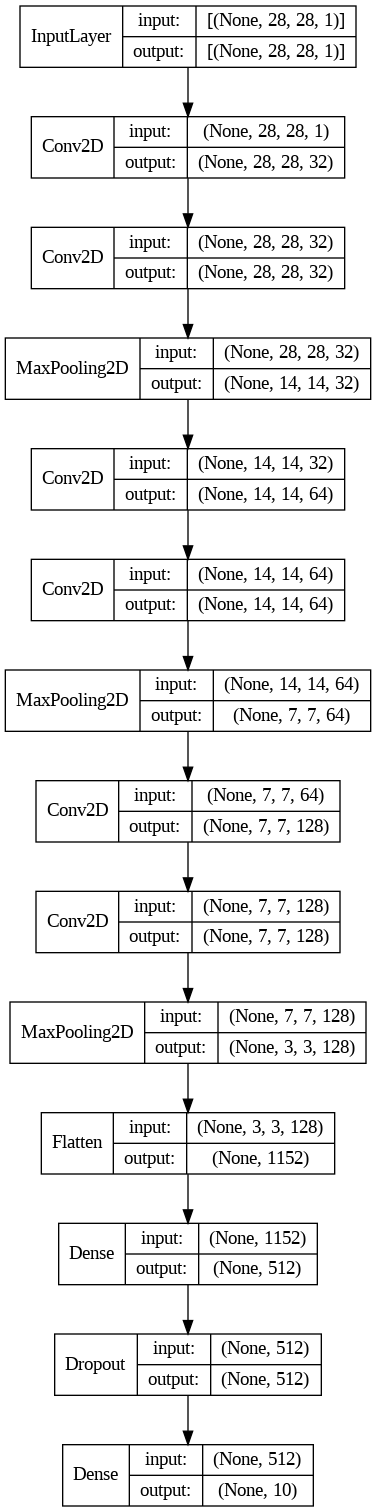

In [ ]:
tf.keras.utils.plot_model(vgg_1, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
early_stopping_callback = callbacks.EarlyStopping(patience=10)

batch_size = X_train.shape[0]//20



vgg_1.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

epochs_info = vgg_1.fit(X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=20,
                            callbacks=[early_stopping_callback],
                            validation_split=0.15)


Epoch 1/20
17/17 [==============================] - 10s 197ms/step - loss: 1.5991 - accuracy: 0.4332 - val_loss: 0.8745 - val_accuracy: 0.6702
Epoch 2/20
17/17 [==============================] - 3s 180ms/step - loss: 0.8156 - accuracy: 0.6977 - val_loss: 0.6523 - val_accuracy: 0.7511
Epoch 3/20
17/17 [==============================] - 3s 180ms/step - loss: 0.6171 - accuracy: 0.7673 - val_loss: 0.5350 - val_accuracy: 0.8060
Epoch 4/20
17/17 [==============================] - 3s 180ms/step - loss: 0.5201 - accuracy: 0.8079 - val_loss: 0.4613 - val_accuracy: 0.8316
Epoch 5/20
17/17 [==============================] - 3s 183ms/step - loss: 0.4526 - accuracy: 0.8333 - val_loss: 0.4065 - val_accuracy: 0.8491
Epoch 6/20
17/17 [==============================] - 3s 182ms/step - loss: 0.4069 - accuracy: 0.8518 - val_loss: 0.3735 - val_accuracy: 0.8620
Epoch 7/20
17/17 [==============================] - 3s 182ms/step - loss: 0.3765 - accuracy: 0.8628 - val_loss: 0.3517 - val_accuracy: 0.8690
Epoch

In [ ]:
vgg_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2280 - accuracy: 0.9158


[0.22796806693077087, 0.9157999753952026]

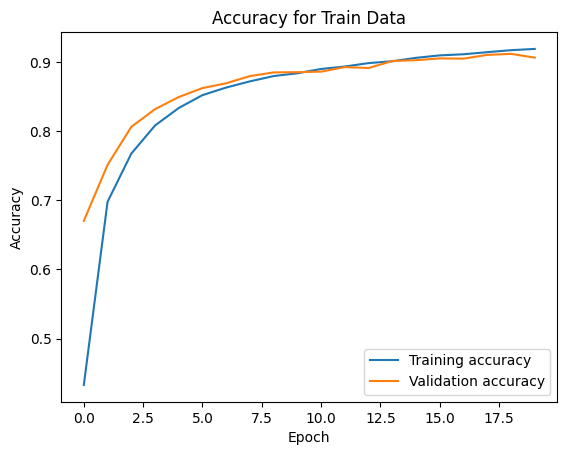

In [ ]:
plt.plot(epochs_info.history['accuracy'])
plt.plot(epochs_info.history['val_accuracy'])
plt.title("Accuracy for Train Data")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

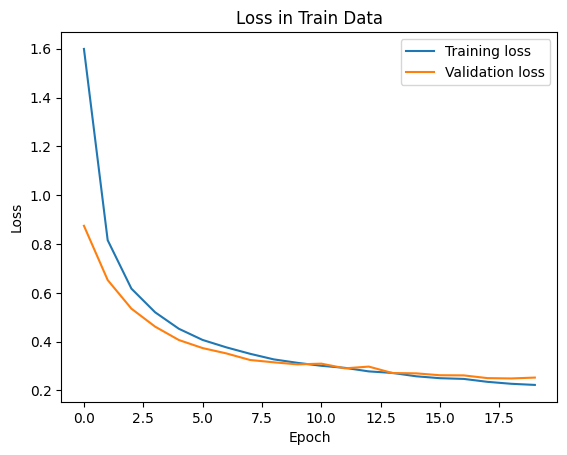

In [ ]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("Loss in Train Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

313/313 [==============================] - 1s 2ms/step


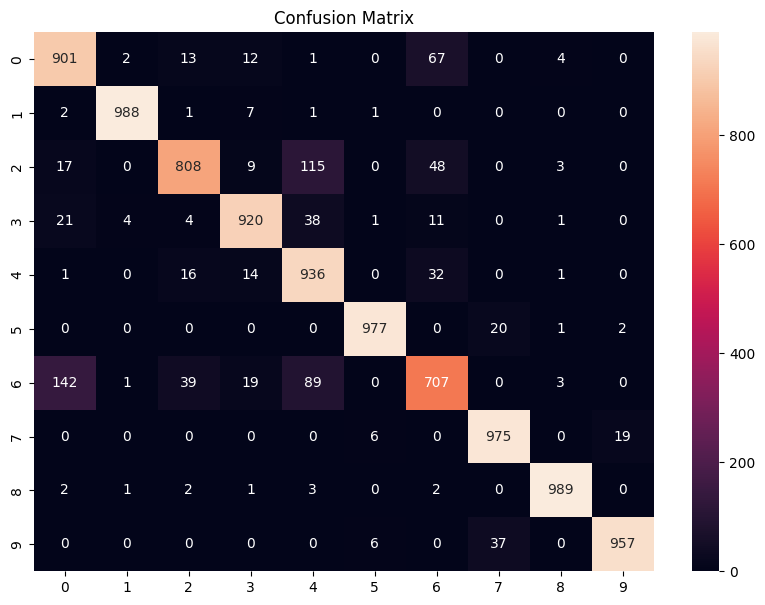

In [ ]:
y_pred = vgg_1.predict(X_test)

# Get the class with highest predicted probability and assume it is the
# model prediction.
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class_names = ["0 -> T-shirt",
               "1 -> Trouser",
               "2 -> Pullover",
               "3 -> Dress",
               "4 -> Coat",
               "5 -> Sandal",
               "6 -> Shirt",
               "7 -> Sneaker",
               "8 -> Bag",
               "9 -> Ankle boot"]
print(classification_report(y_test, y_pred_classes, target_names=class_names))

                 precision    recall  f1-score   support

   0 -> T-shirt       0.83      0.90      0.86      1000
   1 -> Trouser       0.99      0.99      0.99      1000
  2 -> Pullover       0.92      0.81      0.86      1000
     3 -> Dress       0.94      0.92      0.93      1000
      4 -> Coat       0.79      0.94      0.86      1000
    5 -> Sandal       0.99      0.98      0.98      1000
     6 -> Shirt       0.82      0.71      0.76      1000
   7 -> Sneaker       0.94      0.97      0.96      1000
       8 -> Bag       0.99      0.99      0.99      1000
9 -> Ankle boot       0.98      0.96      0.97      1000

       accuracy                           0.92     10000
      macro avg       0.92      0.92      0.92     10000
   weighted avg       0.92      0.92      0.92     10000



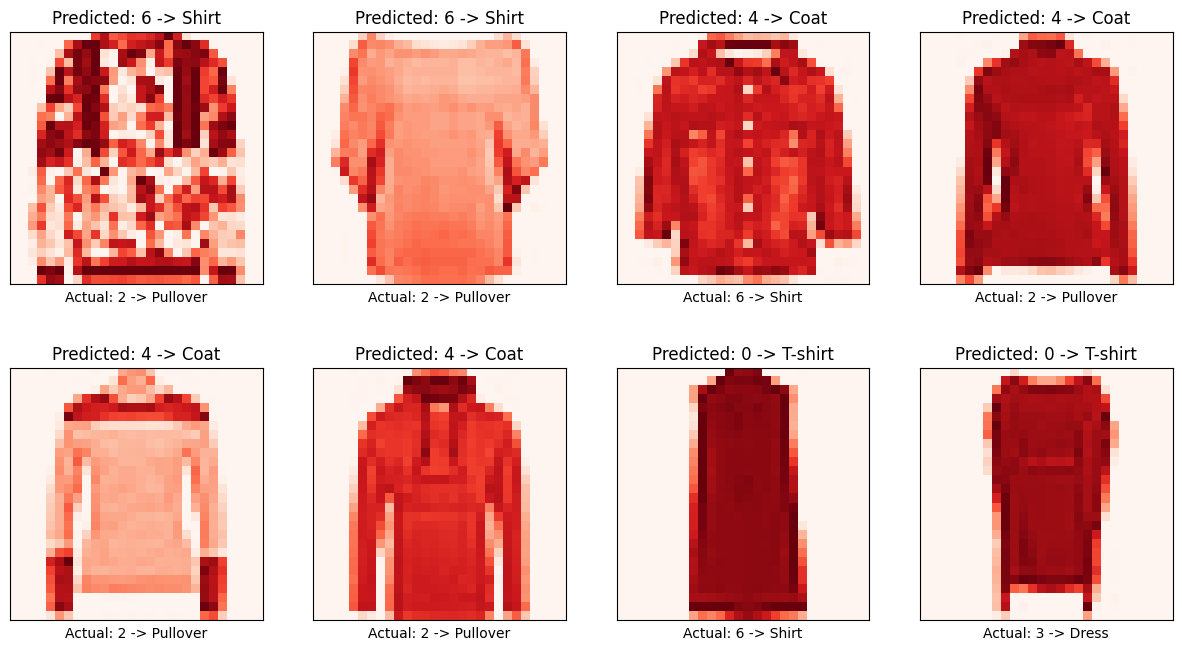

In [ ]:
incorrect = np.nonzero(y_pred_classes!=y_test)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[y_pred_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))